# IPL 2020 Predictions

Indian Premier League (IPL) is a Twenty20 cricket format league in India. It is usually played in April and May every year. As of 2019, the title sponsor of the game is Vivo. The league was founded by Board of Control for Cricket India (BCCI) in 2008.

Content: Match between SRH vs CSK

matches.csv - Match by match data

deliveries.csv - Ball by ball data


In [1]:
#Import Libraries
import numpy as np # linear algebra
import pandas as pd #for importing csv files

import os
os.chdir('C:\\Users\\Manisha\\Desktop\\Data')
match=pd.read_csv('C:/Users/Manisha/Desktop/Internship/Widhya_WPL/12_Oct/matches.csv')
score=pd.read_csv('C:/Users/Manisha/Desktop/Internship/Widhya_WPL/12_Oct/deliveries.csv')

In [2]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
score.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Data Cleaning

In [4]:
match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [5]:
score.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [6]:
match.drop(['umpire3'], axis = 1, inplace = True)

In [7]:
print(match['winner'].unique())
print(match['city'].unique())

['Sunrisers Hyderabad' 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Delhi Daredevils' 'Gujarat Lions' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' nan 'Rising Pune Supergiants' 'Delhi Capitals']
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']


In [8]:
#fill missing values
match['city'].fillna(match['venue'], inplace = True)
match['winner'].fillna(match['result'], inplace = True)
match['player_of_match'].fillna(match['result'], inplace = True)
match['umpire1'].fillna('unknown', inplace = True)
match['umpire2'].fillna('unknown', inplace = True)

# Number of times each team WON the Match

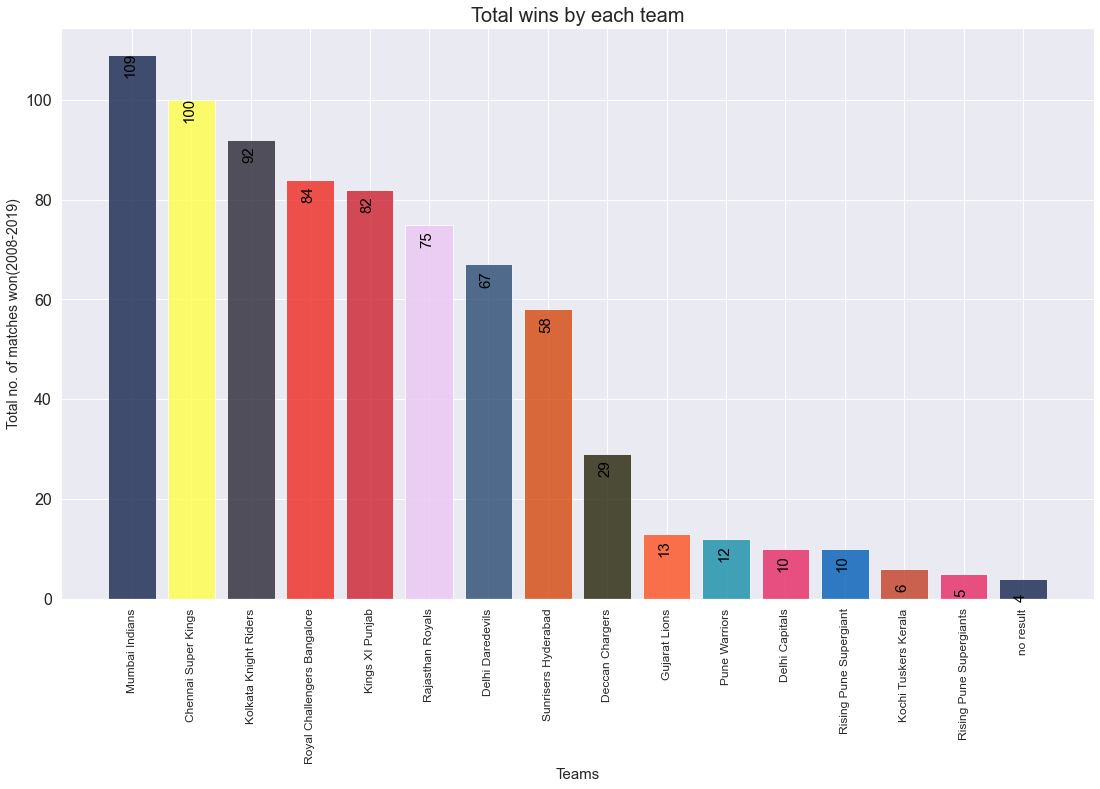

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(match['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'],
        color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
        ,alpha=0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
plt.title('Total wins by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
plt.show()

# Best Umpires

In [10]:
ump=pd.concat([match['umpire1'],match['umpire2']])
ump=ump.value_counts()
umps=ump.to_frame().reset_index()

In [11]:
ump.head()

S Ravi             106
HDPK Dharmasena     87
C Shamshuddin       73
AK Chaudhary        58
SJA Taufel          55
dtype: int64

# Top 20 players with most MOM awards

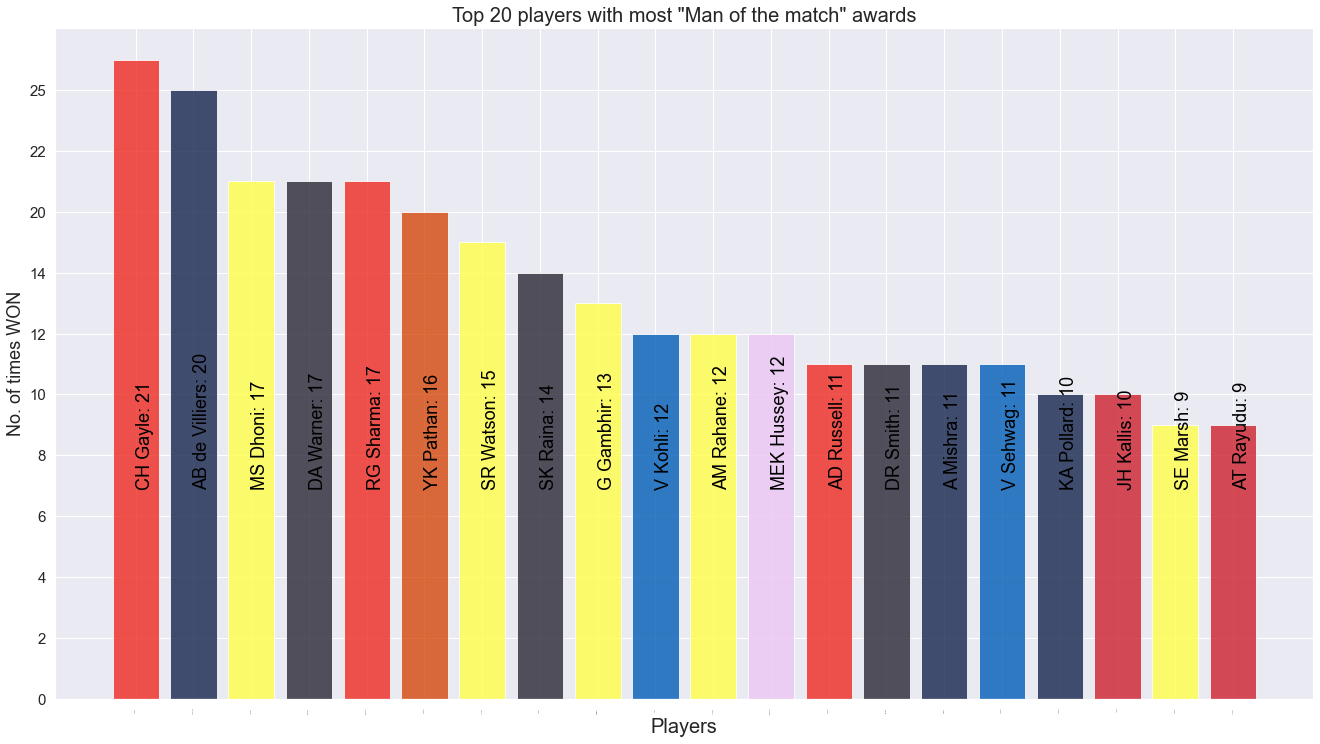

In [14]:
players=pd.DataFrame(match['player_of_match'].value_counts())
players['name']=players.index
players=players.head(20)
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=0)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,20,22,25],fontsize=15)
plt.bar(players['name'], players['player_of_match'],
        color=['#EF2920','#15244C','#FFFF48','#292734','#EF2920',
               '#D4480B','#FFFF48','#292734','#FFFF48','#005DB7','#FFFF48', '#ECC5F2','#EF2920',
               '#292734','#15244C','#005DB7','#15244C',
               '#CD202D', '#FFFF48', '#CD202D'],alpha=0.8)
count=0
for i in players['player_of_match']:
    plt.text(count,7,players['name'][count]+': '+str(i),rotation=90,color='black',size=18)
    count+=1
plt.title('Top 20 players with most "Man of the match" awards',fontsize=20)
plt.xlabel('Players',fontsize=20)
plt.ylabel('No. of times WON',fontsize=18)
plt.tight_layout()
plt.show()

Eliminating redundancy: 
There were two entries for the same city as 'Bangalore' and 'Bengaluru'

In [15]:
match.at[match['city']=='Bengaluru','city']='Bangalore'

# No. of matches hosted at each stadium:
    
Eden Gardens(Kolkata) has hosted most no. of IPL matches(77)

Wankhede and Chinnaswamy tied at no. 2 with 73 matches each.

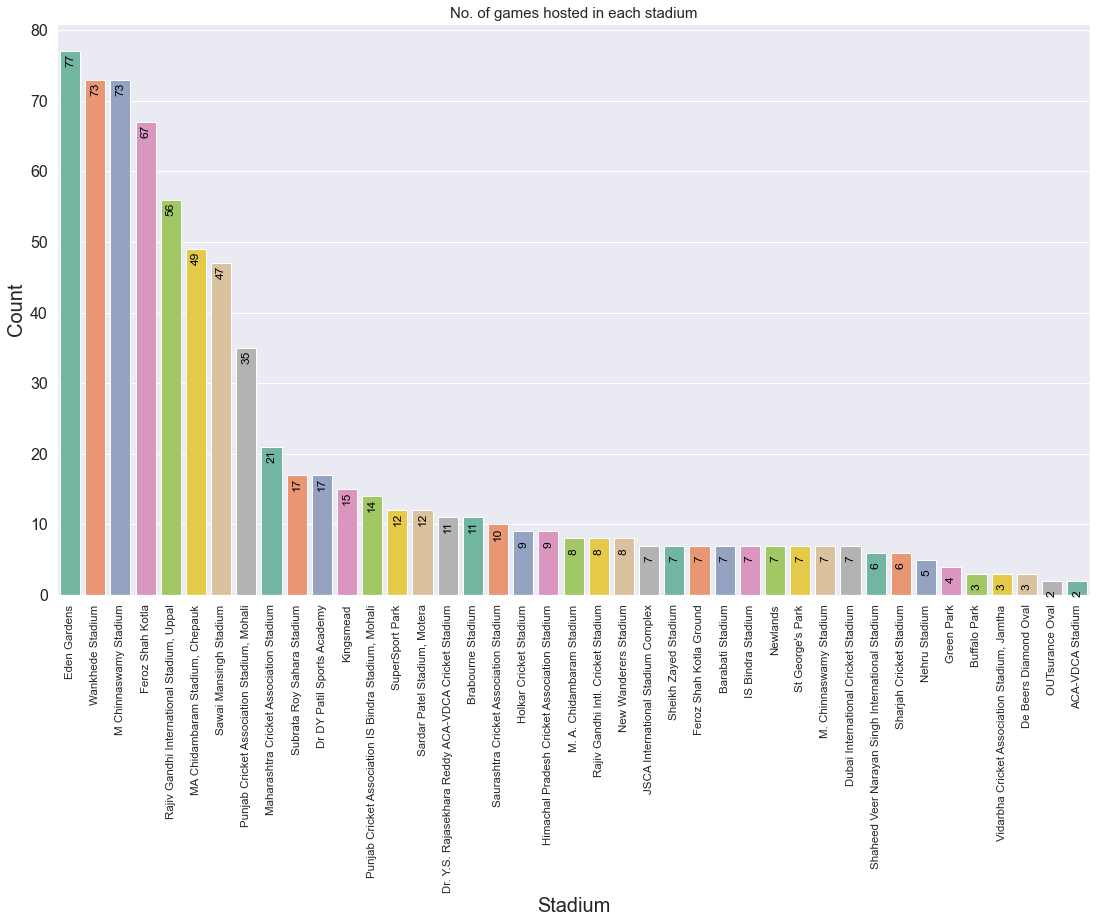

In [16]:
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
sns.countplot(match['venue'],order=match['venue'].value_counts().index,palette='Set2')
plt.xticks(rotation=90,fontsize=11.5)
plt.yticks(fontsize=16)
plt.xlabel('Stadium',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('No. of games hosted in each stadium',fontsize=15)
count=0
venues=pd.DataFrame(match['venue'].value_counts())
venues['name']=match['venue'].value_counts().index
for i in venues['venue']:
    plt.text(count-0.2,i-2,str(i),rotation=90,color='black',size=12)
    count+=1
plt.show()


In [17]:
srhcsk=match[np.logical_or(np.logical_and(match['team1']=='Sunrisers Hyderabad',
                                        match['team2']=='Chennai Super Kings'),
                         np.logical_and(match['team2']=='Sunrisers Hyderabad',
                                        match['team1']=='Chennai Super Kings'))]

# SRH vs CSK -  head to head

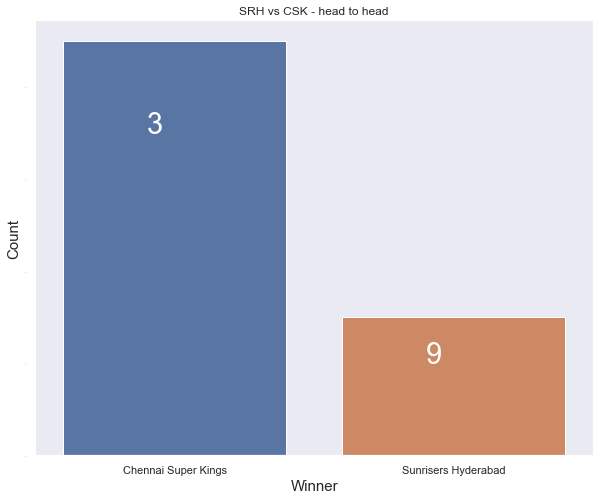

In [18]:
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(srhcsk['winner'],order=srhcsk['winner'].value_counts().index)
plt.text(-0.1,7,str(srhcsk['winner'].value_counts()['Sunrisers Hyderabad']),size=29,color='white')
plt.text(0.9,2,str(srhcsk['winner'].value_counts()['Chennai Super Kings']),size=29,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=0)
plt.title('SRH vs CSK - head to head')
plt.show()

# SRH vs CSK - Best performance

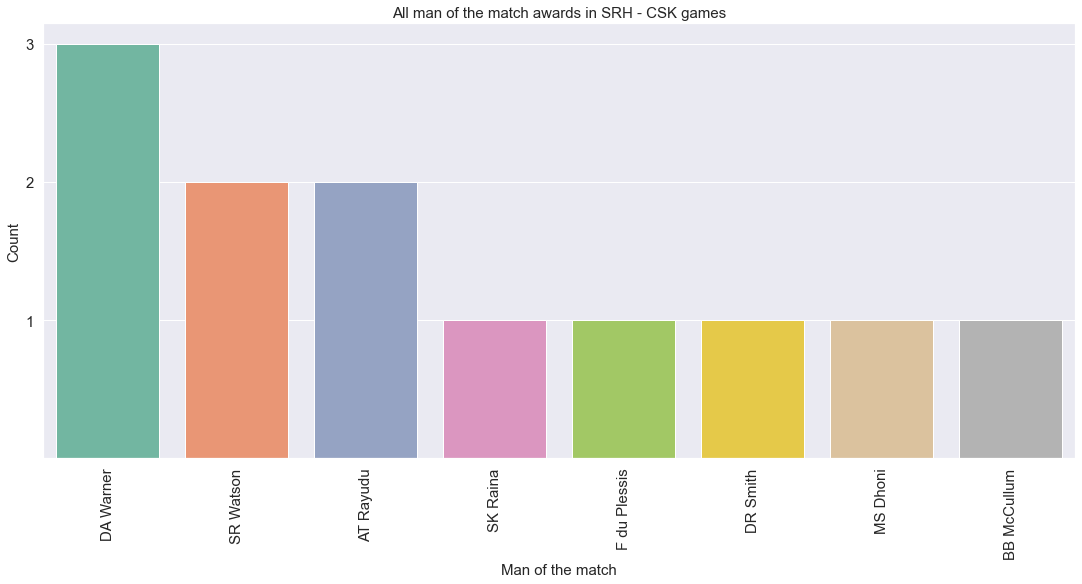

In [19]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(srhcsk['player_of_match'],order=srhcsk['player_of_match'].value_counts().index,palette='Set2')
plt.title('All man of the match awards in SRH - CSK games',fontsize=15)
plt.yticks([1,2,3],[1,2,3],fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Man of the match',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

# Toss decision statistics for all SRH vs CSK matches - Venue wise

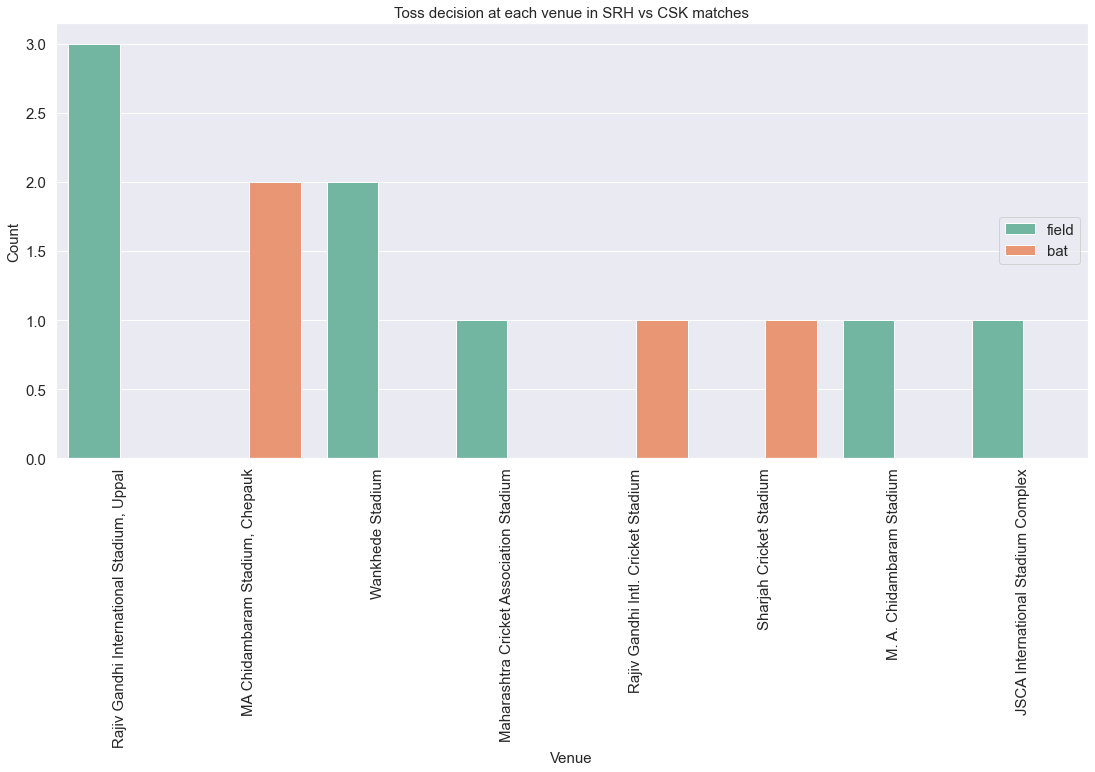

In [20]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(srhcsk['venue'],order=srhcsk['venue'].value_counts().index,palette='Set2',hue=match['toss_decision'])
plt.title('Toss decision at each venue in SRH vs CSK matches',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Venue',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc=5,fontsize=15)
plt.show()

# Decision upon winning the toss by both teams
SRH tends to bowl first(31% of the times)

CSK tends to bowl first(34% of the times)

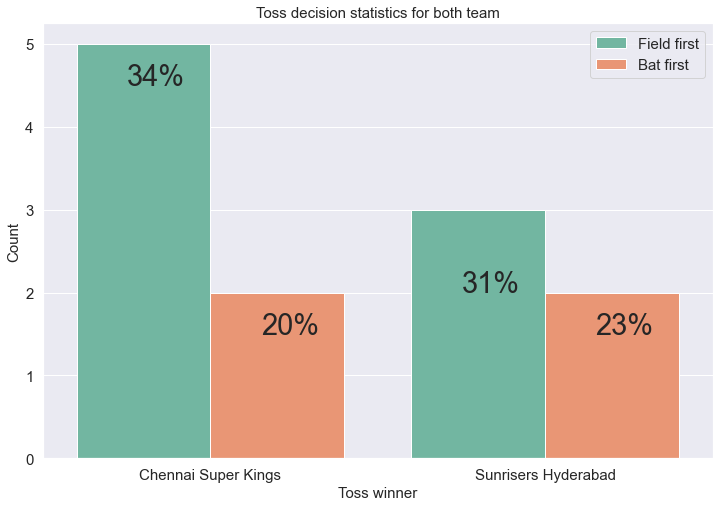

In [21]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(12,8)
sns.countplot(srhcsk['toss_winner'],order=srhcsk['toss_winner'].value_counts().index,palette='Set2',hue=match['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.text(-0.25,4.5,str(int((5/15)*100)+1)+'%',fontsize=29)
plt.text(0.15,1.5,str(int((3/15)*100))+'%',fontsize=29)
plt.text(0.75,2,str(int((4/13)*100)+1)+'%',fontsize=29)
plt.text(1.15,1.5,str(int((3/13)*100))+'%',fontsize=29)
plt.legend(['Field first','Bat first'],loc='best',fontsize=15)
plt.show()

# Season wise match summary of matches won by runs

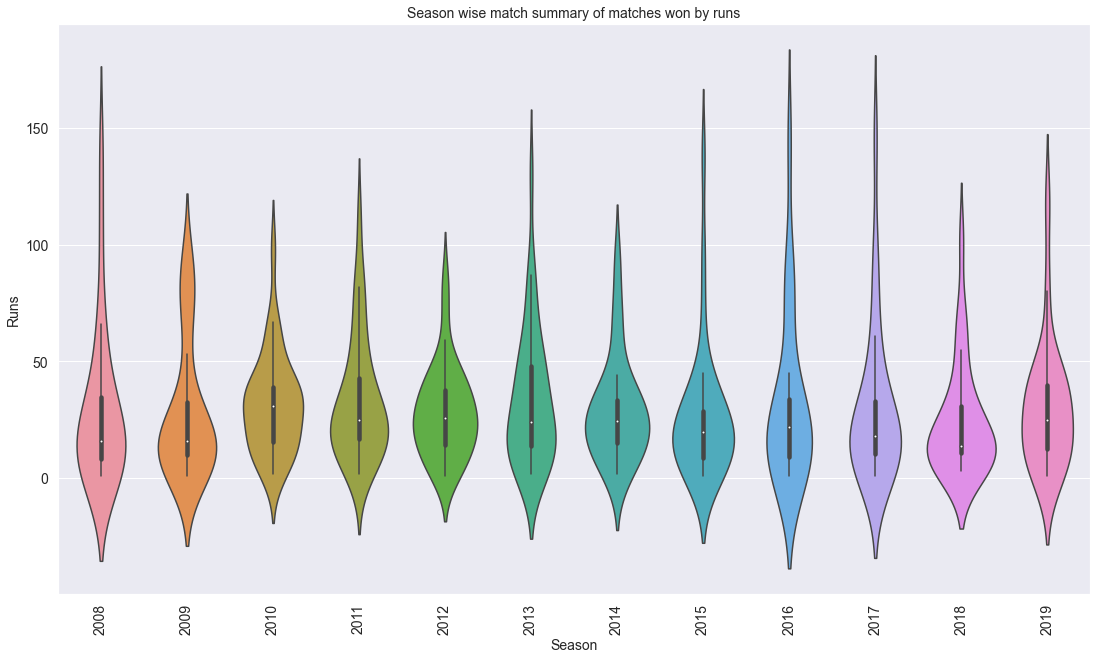

In [22]:
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
sns.violinplot(match['season'],match[match['win_by_runs']!=0]['win_by_runs'],s=10)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.title('Season wise match summary of matches won by runs',fontsize=14)
plt.show()

# Biggest win by runs each season

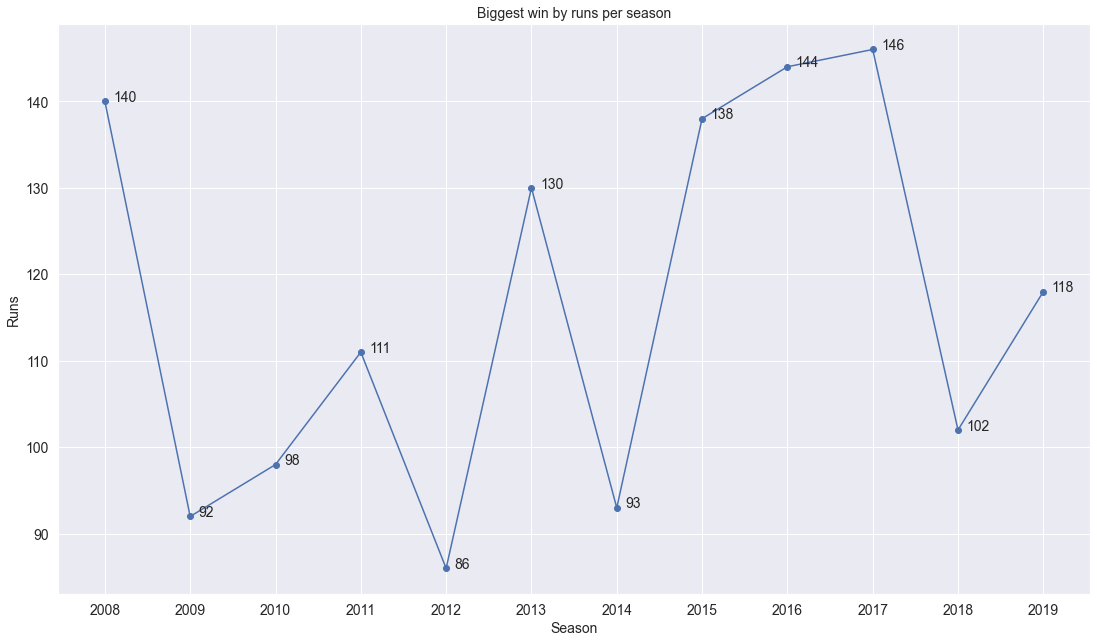

In [23]:
s=2008
season=[]
win_by_runs_max=[]
while s<2020:
    season.append(s)
    win_by_runs_max.append(match[match['season']==s]['win_by_runs'].max())
    s+=1
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.plot(season,win_by_runs_max)
plt.scatter(season,win_by_runs_max)
count=0
while count<12:
    plt.text(season[count]+0.1,win_by_runs_max[count],str(win_by_runs_max[count]),size=14)
    count+=1
plt.xticks(range(2008,2020),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.title('Biggest win by runs per season',fontsize=14)
plt.show()


# Batsmen aggregates (Runs, Balls, 4s, 6s, SR)

In [24]:
batsman_grp = score.groupby(["match_id", "inning", "batting_team", "bowling_team", "batsman"])
batsmen = batsman_grp["batsman_runs"].sum().reset_index()

# Ignore the wide balls.
balls_faced = score[score["wide_runs"] == 0]
balls_faced = balls_faced.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
balls_faced.columns = ["match_id", "inning", "batsman", "balls_faced"]
batsmen = batsmen.merge(balls_faced, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")

fours = score[ score["batsman_runs"] == 4]
sixes = score[ score["batsman_runs"] == 6]

fours_per_batsman = fours.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
sixes_per_batsman = sixes.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()

fours_per_batsman.columns = ["match_id", "inning", "batsman", "4s"]
sixes_per_batsman.columns = ["match_id", "inning", "batsman", "6s"]

batsmen = batsmen.merge(fours_per_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen = batsmen.merge(sixes_per_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen['SR'] = np.round(batsmen['batsman_runs'] / batsmen['balls_faced'] * 100, 2)

for col in ["batsman_runs", "4s", "6s", "balls_faced", "SR"]:
    batsmen[col] = batsmen[col].fillna(0)

dismissals = score[ pd.notnull(score["player_dismissed"])]
dismissals = dismissals[["match_id", "inning", "player_dismissed", "dismissal_kind", "fielder"]]
dismissals.rename(columns={"player_dismissed": "batsman"}, inplace=True)
batsmen = batsmen.merge(dismissals, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")

batsmen = srhcsk[['id','season']].merge(batsmen, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
batsmen.head()

,season,match_id,inning,batting_team,bowling_team,batsman,batsman_runs,balls_faced,4s,6s,SR,dismissal_kind,fielder
0,2013,414,1,Sunrisers Hyderabad,Chennai Super Kings,A Ashish Reddy,36,16.0,2.0,3.0,225.00,NaN,NaN
1,2013,414,1,Sunrisers Hyderabad,Chennai Super Kings,A Mishra,15,21.0,2.0,0.0,71.43,caught,DJ Bravo
2,2013,414,1,Sunrisers Hyderabad,Chennai Super Kings,CL White,2,3.0,0.0,0.0,66.67,caught,MS Dhoni
3,2013,414,1,Sunrisers Hyderabad,Chennai Super Kings,DJG Sammy,19,12.0,2.0,1.0,158.33,caught,CH Morris
4,2013,414,1,Sunrisers Hyderabad,Chennai Super Kings,GH Vihari,2,3.0,0.0,0.0,66.67,run out,SK Raina


# Bowler Aggregates

In [25]:
bowler_grp = score.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])
bowlers = bowler_grp["total_runs", "wide_runs", "bye_runs", "legbye_runs", "noball_runs"].sum().reset_index()

bowlers["runs"] = bowlers["total_runs"] - (bowlers["bye_runs"] + bowlers["legbye_runs"])
bowlers["extras"] = bowlers["wide_runs"] + bowlers["noball_runs"]

del( bowlers["bye_runs"])
del( bowlers["legbye_runs"])
del( bowlers["total_runs"])

dismissal_kinds_for_bowler = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
dismissals = score[score["dismissal_kind"].isin(dismissal_kinds_for_bowler)]
dismissals = dismissals.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])["dismissal_kind"].count().reset_index()
dismissals.rename(columns={"dismissal_kind": "wickets"}, inplace=True)

bowlers = bowlers.merge(dismissals, left_on=["match_id", "inning", "bowling_team", "bowler", "over"], 
                        right_on=["match_id", "inning", "bowling_team", "bowler", "over"], how="left")
bowlers["wickets"] = bowlers["wickets"].fillna(0)

bowlers_over = bowlers.groupby(['match_id', 'inning', 'bowling_team', 'bowler'])['over'].count().reset_index()
bowlers = bowlers.groupby(['match_id', 'inning', 'bowling_team', 'bowler']).sum().reset_index().drop('over', 1)
bowlers = bowlers_over.merge(bowlers, on=["match_id", "inning", "bowling_team", "bowler"], how = 'left')
bowlers['Econ'] = np.round(bowlers['runs'] / bowlers['over'] , 2)
bowlers = srhcsk[['id','season']].merge(bowlers, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

bowlers.head()

<ipython-input-25-398ee8fc4fc0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bowlers = bowler_grp["total_runs", "wide_runs", "bye_runs", "legbye_runs", "noball_runs"].sum().reset_index()


,season,match_id,inning,bowling_team,bowler,over,wide_runs,noball_runs,runs,extras,wickets,Econ
0,2013,414,1,Chennai Super Kings,CH Morris,3,0,0,24,0,0.0,8.00
1,2013,414,1,Chennai Super Kings,DJ Bravo,4,0,0,37,0,2.0,9.25
2,2013,414,1,Chennai Super Kings,JO Holder,4,2,0,31,2,0.0,7.75
3,2013,414,1,Chennai Super Kings,MM Sharma,4,0,0,33,0,2.0,8.25
4,2013,414,1,Chennai Super Kings,R Ashwin,4,1,0,21,1,1.0,5.25


# Finding the relations between the variables.


,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.963544,NaN,-0.484188,0.407204
season,0.963544,1.000000,NaN,-0.492167,0.326476
dl_applied,NaN,NaN,NaN,NaN,NaN
win_by_runs,-0.484188,-0.492167,NaN,1.000000,-0.653595
win_by_wickets,0.407204,0.326476,NaN,-0.653595,1.000000


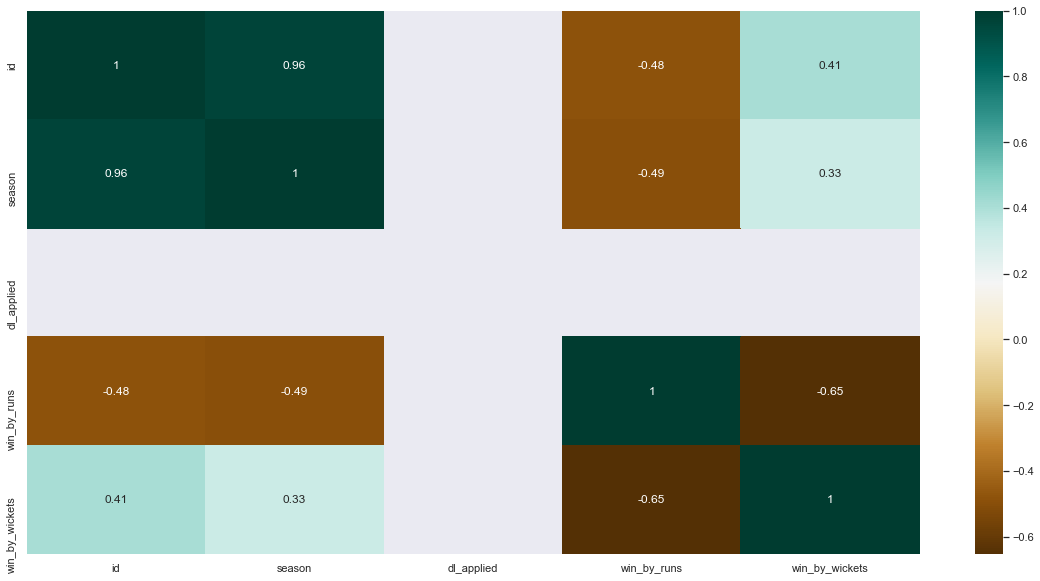

In [26]:
plt.figure(figsize=(20,10))
c= srhcsk.corr()
sns.heatmap(c,cmap="BrBG", annot=True)
c